Importing the dependencies



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
#Shape of numpy arrays
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


This means that the dataset has 60,000 training images and 10,000 test images

Dimension of Image =  28 x 28

Grayscale Image = 1 Channel

In [ ]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(x_train[10].shape)

(28, 28)


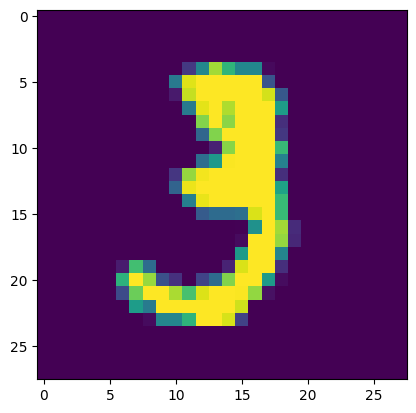

Corresponding Y-label : 3


In [ ]:
#Displaying the img
plt.imshow(x_train[10])
plt.show()

#Print the corresponding label
print("Corresponding Y-label :", y_train[10])

Image Labels

In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
# Unique values in y train
print(np.unique(y_train))

# Unique values in y test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these values as it is or use One Hot Encoding

We have to resize all the images which are not of the same dimension as others

In [ ]:
# Scaling the values
x_train = x_train/255
x_test =  x_test/255

Now every value will be in between 0 and 1

In [ ]:
# Printing the 10th value after standardizing
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# Setting up the layers of the Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation= 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compiling the Neural Network

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training the neural network

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8438 - loss: 0.5398
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9560 - loss: 0.1465
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9700 - loss: 0.1029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9759 - loss: 0.0789
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9813 - loss: 0.0638
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9851 - loss: 0.0519
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0443
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0385
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0354
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0290


Training Data Accuracy = 99.14%

**Accuracy on Test Data**

In [ ]:
loss , accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1174
Test Loss: 0.10781413316726685
Test Accuracy: 0.972100019454956


Test Data Accuracy = 97.21%

In [ ]:
print(x_test.shape)

(10000, 28, 28)


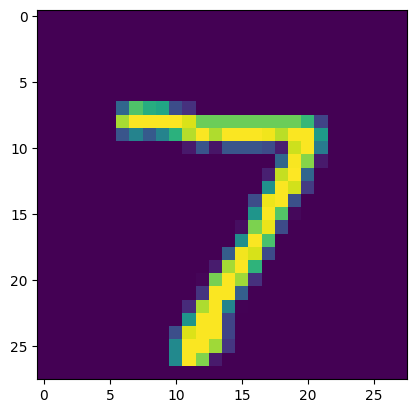

In [ ]:
# First data pt in x_test
plt.imshow(x_test[0])
plt.show()

In [24]:
print(y_test[0])

7


In [25]:
y_pred = model.predict(x_test)
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)


In [26]:
print(y_pred[0])

[2.41432209e-02 6.90612142e-05 1.89493280e-02 9.70967531e-01
 6.37931180e-07 3.52512106e-05 8.62714067e-11 9.99997616e-01
 3.76475230e-03 1.05863675e-01]


model.predict() give the probability of each class for that data point

In [28]:
# Converting the prediction probabilities to class label
label_for_first_img = np.argmax(y_pred[0])
print(label_for_first_img)

7


In [30]:
# Converting the prediction probabilities to class label for all the data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

y_test --> true labels

y_pred_labels --> predicted labels

Confusion Matrix

In [32]:
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

tf.Tensor(
[[ 960    0    1    1    2    2    3    0    3    8]
 [   0 1118    1    4    0    1    4    1    6    0]
 [   2    1  987   19    6    1    4    5    7    0]
 [   0    0    3  990    2    1    0    5    2    7]
 [   0    0    2    1  964    0    4    3    2    6]
 [   2    0    0   18    3  856    6    2    2    3]
 [   4    2    2    1    6    5  937    0    1    0]
 [   1    0    8    4    2    1    0  998    3   11]
 [   4    0    3   12    3    5    4    4  933    6]
 [   1    2    0    5   15    4    1    2    3  976]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

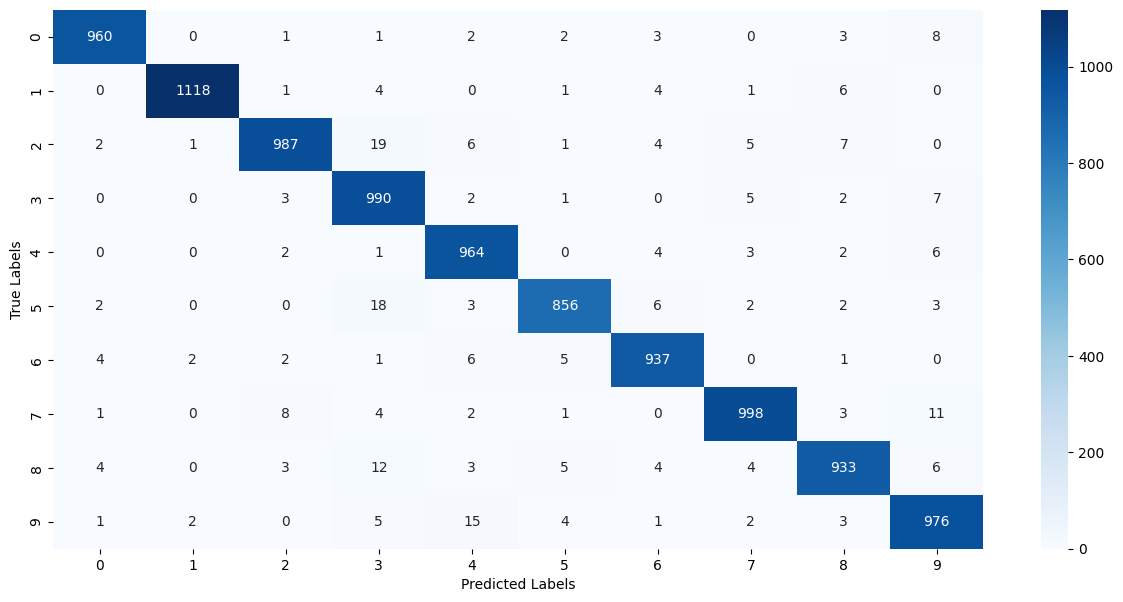

In [33]:
plt.figure(figsize = (15,7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [36]:
input_img_path = '/content/MNIST_digit.png'

input_img = cv2.imread(input_img_path)

In [37]:
type(input_img)

numpy.ndarray

In [38]:
print(input_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


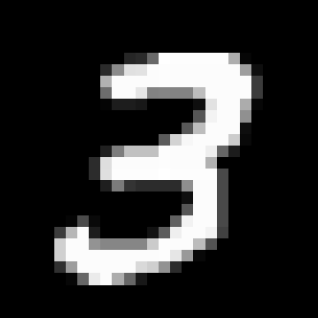

In [39]:
cv2_imshow(input_img)

In [41]:
input_img.shape

(318, 318, 3)

We have to convert this into a greyscale image, since the cv2_imshow function is reading it as an RGB img

Also, we have to change the size of the image

In [47]:
grayscale = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
grayscale.shape

(318, 318)

In [52]:
input_img_resized = cv2.resize(grayscale, (28,28))
input_img_resized.shape

(28, 28)

In [46]:
cv2_imshow(input_img_resized)

In [51]:
input_img_resized = input_img_resized/255
img_reshaped = np.reshape(input_img_resized, (1,28,28))

In [50]:
input_prediction = model.predict(img_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[2.3812815e-13 2.1771661e-05 4.8189002e-05 1.0000000e+00 3.4482317e-15
  2.8518714e-02 4.4359988e-24 2.1500334e-02 3.7559617e-02 9.6609133e-01]]


In [53]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3
